## Analyzing the results obtained from the executed experiments


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from scipy.stats import friedmanchisquare, wilcoxon
from statsmodels.stats import multicomp
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('./ALL_results.csv', sep=',')

In [42]:
df['atributos'] = df['corr_threshold'].astype(str) + '_' + df['const_threshold'].astype(str)

In [43]:
df['Model'] = df['Model'].str.replace(r'\bdt\b', 'DT', regex=True)
df['Model'] = df['Model'].str.replace(r'\bnb\b', 'NB', regex=True)
df['Model'] = df['Model'].str.replace(r'\bneigh\b', 'KNN', regex=True)
df['Model'] = df['Model'].str.replace(r'\brf\b', 'RF', regex=True)

print(df['Model'].unique())


['DT' 'RF' 'KNN' 'NB']


In [44]:
df['data_model'] = df['Model'].astype(str) + '_' + df['Dataset'].astype(str) 
print(df['data_model'])

0                   DT_data_dv_reg_desistran_10_periodo.csv
1                   DT_data_dv_reg_desistran_10_periodo.csv
2                   DT_data_dv_reg_desistran_10_periodo.csv
3                   DT_data_dv_reg_desistran_10_periodo.csv
4                   DT_data_dv_reg_desistran_10_periodo.csv
                                ...                        
198395    NB_data_dv_last_occurence_reg_desis_engenharia...
198396    NB_data_dv_last_occurence_reg_desis_engenharia...
198397    NB_data_dv_last_occurence_reg_desis_engenharia...
198398    NB_data_dv_last_occurence_reg_desis_engenharia...
198399    NB_data_dv_last_occurence_reg_desis_engenharia...
Name: data_model, Length: 198400, dtype: object


In [45]:
df.columns

Index(['Dataset', 'corr_threshold', 'const_threshold', 'seed',
       'class_distribution', 'dropout', 'regular', 'Model', 'Accuracy',
       'Balanced Accuracy', 'f1-score', 'recall', 'precision',
       'CM - True Positive', 'CM - False Negative', 'CM - False Positive',
       'CM - True Negative', 'atributos', 'data_model'],
      dtype='object')

In [46]:
# Lista de palavras-chave para o filtro
keywords = [
    'data_dv_Form_Desis', 'data_dv_FormReg_Desis', 'data_dv_FormReg_DesisTran', 
    'data_dv_Reg_Desis', 'data_dv_Reg_DesisTran', 'data_dv_last_occurence_Form_Desis', 
    'data_dv_last_occurence_FormReg_Desis', 'data_dv_last_occurence_FormReg_DesisTran', 
    'data_dv_last_occurence_Reg_Desis', 'data_dv_last_occurence_Reg_DesisTran', 
    'data_dv_formreg_desistran_8_periodo', 'data_dv_formreg_desistran_7_periodo', 
    'data_dv_formreg_desistran_6_periodo', 'data_dv_formreg_desistran_5_periodo', 
    'data_dv_formreg_desistran_4_periodo', 'data_dv_formreg_desistran_3_periodo', 
    'data_dv_formreg_desistran_2_periodo', 'data_dv_formreg_desistran_1_periodo', 
    'data_dv_formreg_desistran_9_periodo', 'data_dv_formreg_desistran_10_periodo', 
    'data_dv_formreg_desistran_4a10.csv', 'data_dv_formreg_desistran_1a5.csv', 
    'data_dv_formreg_desistran_1a3.csv', 'data_dv_last_occurence_formreg_desistran_8_periodo', 
    'data_dv_last_occurence_formreg_desistran_7_periodo', 'data_dv_last_occurence_formreg_desistran_6_periodo', 
    'data_dv_last_occurence_formreg_desistran_5_periodo', 'data_dv_last_occurence_formreg_desistran_4_periodo', 
    'data_dv_last_occurence_formreg_desistran_3_periodo', 'data_dv_last_occurence_formreg_desistran_2_periodo', 
    'data_dv_last_occurence_formreg_desistran_1_periodo', 'data_dv_last_occurence_formreg_desistran_9_periodo', 
    'data_dv_last_occurence_formreg_desistran_10_periodo', 'data_dv_last_occurence_formreg_desistran_4a10.csv', 
    'data_dv_last_occurence_formreg_desistran_1a5.csv', 'data_dv_last_occurence_formreg_desistran_1a3.csv'
]

data_filter = df[df['Dataset'].str.contains('|'.join(keywords))]


In [47]:
# Definindo o mapeamento dos datasets
dataset_labels = {
    'data_dv_last_occurence_FormReg_DesisTran.csv': 'Últimos Registros de Formado + \nRegular vs Desistente + Trancado',
    'data_dv_last_occurence_Reg_DesisTran.csv': 'Últimos Registros de Regular\n vs Desistente + Trancado',
    'data_dv_last_occurence_FormReg_Desis.csv': 'Últimos Registros de Formado\n + Regular vs Desistente',
    'data_dv_last_occurence_Form_Desis.csv': 'Últimos Registros de\nFormado vs Desistente',
    'data_dv_last_occurence_Reg_Desis.csv': 'Últimos Registros de\nRegular vs Desistente',
    'data_dv_FormReg_DesisTran.csv': 'Completo com Formado + Regular\n vs Desistente + Trancado',
    'data_dv_Reg_DesisTran.csv': 'Completo com Regular vs\n Desistente + Trancado',
    'data_dv_FormReg_Desis.csv': 'Completo com Formado\n + Regular vs Desistente',
    'data_dv_Form_Desis.csv': 'Completo com\nFormado vs Desistente',
    'data_dv_Reg_Desis.csv': 'Completo com\nRegular vs Desistente',
    'data_dv_formreg_desistran_8_periodo.csv': '8º Período',
    'data_dv_formreg_desistran_7_periodo.csv': '7º Período',
    'data_dv_formreg_desistran_6_periodo.csv': '6º Período',
    'data_dv_formreg_desistran_5_periodo.csv': '5º Período',
    'data_dv_formreg_desistran_4_periodo.csv': '4º Período',
    'data_dv_formreg_desistran_3_periodo.csv': '3º Período',
    'data_dv_formreg_desistran_2_periodo.csv': '2º Período',
    'data_dv_formreg_desistran_1_periodo.csv': '1º Período',
    'data_dv_formreg_desistran_9_periodo.csv': '9º Período',
    'data_dv_formreg_desistran_10_periodo.csv': '10º Período',
    'data_dv_formreg_desistran_4a10.csv': '4º ao 10º Período',
    'data_dv_formreg_desistran_1a5.csv': '1º ao 5º Período',
    'data_dv_formreg_desistran_1a3.csv': '1º ao 3º Período',
    'data_dv_last_occurence_formreg_desistran_8_periodo.csv': 'Últimos Registros - 8º Período',
    'data_dv_last_occurence_formreg_desistran_7_periodo.csv': 'Últimos Registros - 7º Período',
    'data_dv_last_occurence_formreg_desistran_6_periodo.csv': 'Últimos Registros - 6º Período',
    'data_dv_last_occurence_formreg_desistran_5_periodo.csv': 'Últimos Registros - 5º Período',
    'data_dv_last_occurence_formreg_desistran_4_periodo.csv': 'Últimos Registros - 4º Período',
    'data_dv_last_occurence_formreg_desistran_3_periodo.csv': 'Últimos Registros - 3º Período',
    'data_dv_last_occurence_formreg_desistran_2_periodo.csv': 'Últimos Registros - 2º Período',
    'data_dv_last_occurence_formreg_desistran_1_periodo.csv': 'Últimos Registros - 1º Período',
    'data_dv_last_occurence_formreg_desistran_9_periodo.csv': 'Últimos Registros - 9º Período',
    'data_dv_last_occurence_formreg_desistran_10_periodo.csv': 'Últimos Registros - 10º Período',
    'data_dv_last_occurence_formreg_desistran_4a10.csv': 'Últimos Registros do 4º ao 10º Período',
    'data_dv_last_occurence_formreg_desistran_1a5.csv': 'Últimos Registros do 1º ao 5º Período',
    'data_dv_last_occurence_formreg_desistran_1a3.csv': 'Últimos Registros do 1º ao 3º Período'
}

# Aplicando o mapeamento ao DataFrame
#df['Dataset'] = df['Dataset'].replace(dataset_labels)

# Se quiser verificar o resultado
#print(df[['Dataset']].drop_duplicates())


In [48]:
# Calcular a média de 'Balanced Accuracy', 'f1-score', 'recall', 'precision'
mean_values = data_filter.groupby('Dataset')[['Balanced Accuracy', 'f1-score', 'recall', 'precision']].mean()

# Filtrar datasets com todas as métricas acima de 0.5
mean_values_filtered = mean_values[(mean_values > 0.7).all(axis=1)]

# Calcular o balanceamento de classe
class_balance = df.groupby('Dataset')[['dropout', 'regular']].agg(lambda x: x.mode()[0])

# Calcular a porcentagem de dropouts (percentual de 1s na coluna 'dropout')
dropout_percentage = df.groupby('Dataset')['dropout'].mean() * 100

# Adicionar a coluna de porcentagem de dropouts
mean_values_filtered = mean_values_filtered.join(dropout_percentage.rename('dropout_percentage'))

# Mesclar as informações de médias e balanceamento de classe
result = pd.merge(mean_values_filtered, class_balance, on='Dataset')

# Gerar a tabela LaTeX
latex_table = result.to_latex(index=True, caption="Médias de desempenho dos datasets com valores superiores a 0.5",
                              label="tab:datasets_performance", float_format="%.3f")

# Exibir a tabela LaTeX
print(latex_table)


\begin{table}
\caption{Médias de desempenho dos datasets com valores superiores a 0.5}
\label{tab:datasets_performance}
\begin{tabular}{lrrrrrrr}
\toprule
 & Balanced Accuracy & f1-score & recall & precision & dropout_percentage & dropout & regular \\
Dataset &  &  &  &  &  &  &  \\
\midrule
data_dv_FormReg_DesisTran.csv & 0.867 & 0.757 & 0.757 & 0.790 & 635300.000 & 6353 & 37073 \\
data_dv_Form_Desis.csv & 0.833 & 0.864 & 0.851 & 0.882 & 277000.000 & 2770 & 1660 \\
data_dv_Reg_DesisTran.csv & 0.867 & 0.759 & 0.758 & 0.796 & 635300.000 & 6353 & 35413 \\
data_dv_formreg_desistran_1_periodo.csv & 0.839 & 0.748 & 0.755 & 0.766 & 185900.000 & 1859 & 4362 \\
data_dv_formreg_desistran_1a3.csv & 0.856 & 0.750 & 0.745 & 0.818 & 498600.000 & 4986 & 17186 \\
data_dv_formreg_desistran_1a5.csv & 0.864 & 0.760 & 0.754 & 0.817 & 580100.000 & 5801 & 24221 \\
data_dv_formreg_desistran_2_periodo.csv & 0.882 & 0.785 & 0.790 & 0.780 & 221500.000 & 2215 & 7662 \\
data_dv_formreg_desistran_3_periodo.csv & 

In [49]:
thresholds = [0.8, 0.85, 0.9, 0.95]

result = {threshold: df.loc[df['corr_threshold'] == threshold, 'f1-score'].values for threshold in thresholds}

result_df = pd.DataFrame(dict([(k, v) for k, v in result.items()]))

result_df.to_csv('thresholds_corr.csv', index=False)


In [50]:
thresholds = [0.05, 0.1, 0.15, 0.2]

result = {threshold: df.loc[df['const_threshold'] == threshold, 'f1-score'].values for threshold in thresholds}

result_df = pd.DataFrame(dict([(k, v) for k, v in result.items()]))

result_df.to_csv('thresholds_const.csv', index=False)


In [51]:
filtered_data_dv_all = df[df['Dataset'].str.contains('data_dv_Form_Desis') | 
                          df['Dataset'].str.contains('data_dv_FormReg_Desis') | 
                          df['Dataset'].str.contains('data_dv_FormReg_DesisTran') | 
                          df['Dataset'].str.contains('data_dv_Reg_Desis') | 
                          df['Dataset'].str.contains('data_dv_Reg_DesisTran') | 
                          df['Dataset'].str.contains('data_dv_last_occurence_Form_Desis') | 
                          df['Dataset'].str.contains('data_dv_last_occurence_FormReg_Desis') | 
                          df['Dataset'].str.contains('data_dv_last_occurence_FormReg_DesisTran') | 
                          df['Dataset'].str.contains('data_dv_last_occurence_Reg_Desis') | 
                          df['Dataset'].str.contains('data_dv_last_occurence_Reg_DesisTran')]

In [52]:
thresholds = [0.8, 0.85, 0.9, 0.95]

result = {threshold: filtered_data_dv_all.loc[filtered_data_dv_all['corr_threshold'] == threshold, 'f1-score'].values for threshold in thresholds}

result_df = pd.DataFrame(dict([(k, v) for k, v in result.items()]))

result_df.to_csv('thresholds_corr.csv', index=False)


In [53]:
thresholds = [0.05, 0.1, 0.15, 0.2]

result = {threshold: filtered_data_dv_all.loc[filtered_data_dv_all['const_threshold'] == threshold, 'f1-score'].values for threshold in thresholds}

result_df = pd.DataFrame(dict([(k, v) for k, v in result.items()]))

result_df.to_csv('thresholds_const.csv', index=False)


In [54]:
# Filtra os dados
filtered_data_dv_all = df[ 
    df['Dataset'].str.contains('data_dv_Form_Desis|data_dv_FormReg_Desis|data_dv_FormReg_DesisTran|data_dv_Reg_Desis|data_dv_Reg_DesisTran|data_dv_last_occurence_Form_Desis|data_dv_last_occurence_FormReg_Desis|data_dv_last_occurence_FormReg_DesisTran|data_dv_last_occurence_Reg_Desis|data_dv_last_occurence_Reg_DesisTran', regex=True)
]

filtered_data = filtered_data_dv_all[ 
    (filtered_data_dv_all['corr_threshold'] == 0.80) & 
    (filtered_data_dv_all['const_threshold'] == 0.05)
]

# Mapeia os diferentes datasets para as novas colunas
dataset_map = {
    'data_dv_Form_Desis': 'data_dv_last_occurence_Form_Desis',
    'data_dv_FormReg_Desis': 'data_dv_last_occurence_FormReg_Desis',
    'data_dv_FormReg_DesisTran': 'data_dv_last_occurence_FormReg_DesisTran',
    'data_dv_Reg_Desis': 'data_dv_last_occurence_Reg_Desis',
    'data_dv_Reg_DesisTran': 'data_dv_last_occurence_Reg_DesisTran'
}

# Cria uma lista com os nomes das colunas desejadas
column_names = [
    'Formado vs Desistente',
    'Formado + Regular vs Desistente',
    'Formado + Regular vs Desistente + Trancado',
    'Regular vs Desistente',
    'Regular vs Desistente + Trancado'
]

# Dicionário para armazenar os resultados
result = {}

for i, (dataset_1, dataset_2) in enumerate(dataset_map.items()):
    # Filtra os dados para os dois datasets
    combined_data = filtered_data[
        (filtered_data['Dataset'].str.contains(dataset_1)) |
        (filtered_data['Dataset'].str.contains(dataset_2))
    ]
    
    # Verifica se o número de elementos é o mesmo e ajusta
    f1_scores = combined_data['f1-score'].values
    max_length = max([len(f1_scores) for f1_scores in result.values()], default=0)
    
    # Adiciona os valores de f1-score com preenchimento se necessário
    result[column_names[i]] = list(f1_scores) + [None] * (max_length - len(f1_scores))

# Cria o DataFrame final com os resultados
result_df = pd.DataFrame(result)

# Salva o DataFrame em um arquivo CSV
result_df.to_csv('filtered_datas_f1_scores.csv', index=False)

print("CSV gerado com sucesso: 'filtered_datas_f1_scores.csv'")


ValueError: All arrays must be of the same length

In [55]:
filtered_data_dv_all = df[ 
    df['Dataset'].str.contains('data_dv_Form_Desis|data_dv_FormReg_Desis|data_dv_FormReg_DesisTran|data_dv_Reg_Desis|data_dv_Reg_DesisTran|data_dv_last_occurence_Form_Desis|data_dv_last_occurence_FormReg_Desis|data_dv_last_occurence_FormReg_DesisTran|data_dv_last_occurence_Reg_Desis|data_dv_last_occurence_Reg_DesisTran', regex=True)
]

filtered_data = filtered_data_dv_all[ 
    (filtered_data_dv_all['corr_threshold'] == 0.80) & 
    (filtered_data_dv_all['const_threshold'] == 0.05)
]

# Mapeia os diferentes datasets para as novas colunas
dataset_map = {
    'data_dv_Form_Desis': 'data_dv_last_occurence_Form_Desis',
    'data_dv_FormReg_Desis': 'data_dv_last_occurence_FormReg_Desis',
    'data_dv_FormReg_DesisTran': 'data_dv_last_occurence_FormReg_DesisTran',
    'data_dv_Reg_Desis': 'data_dv_last_occurence_Reg_Desis',
    'data_dv_Reg_DesisTran': 'data_dv_last_occurence_Reg_DesisTran'
}

# Cria uma lista com os nomes das colunas desejadas
column_names = [
    'Formado vs Desistente',
    'Formado + Regular vs Desistente',
    'Formado + Regular vs Desistente + Trancado',
    'Regular vs Desistente',
    'Regular vs Desistente + Trancado'
]

result = {}
for i, (dataset_1, dataset_2) in enumerate(dataset_map.items()):
    # Filtra os dados para os dois datasets
    combined_data = filtered_data[
        (filtered_data['Dataset'].str.contains(dataset_1)) |
        (filtered_data['Dataset'].str.contains(dataset_2))
    ]
    
    # Calcula a média do f1-score para cada Modelo, agora agrupando pelos nomes dos datasets
    result[column_names[i]] = combined_data.groupby('Model')['f1-score'].mean()

# Cria o DataFrame final com os resultados
result_df = pd.DataFrame(result)

# Salva o DataFrame em um arquivo CSV
result_df.to_csv('filtered_datas_f1_scores.csv', index=False)

print("CSV gerado com sucesso: 'filtered_datas_f1_scores.csv'")


CSV gerado com sucesso: 'filtered_datas_f1_scores.csv'


In [56]:
filtered_data_dv = df[df['Dataset'].str.contains('data_dv_formreg_desistran_8_periodo') | 
                   df['Dataset'].str.contains('data_dv_formreg_desistran_7_periodo') | 
                    df['Dataset'].str.contains('data_dv_formreg_desistran_6_periodo') | 
                    df['Dataset'].str.contains('data_dv_formreg_desistran_5_periodo') | 
                    df['Dataset'].str.contains('data_dv_formreg_desistran_4_periodo') | 
                    df['Dataset'].str.contains('data_dv_formreg_desistran_3_periodo') | 
                    df['Dataset'].str.contains('data_dv_formreg_desistran_2_periodo') | 
                    df['Dataset'].str.contains('data_dv_formreg_desistran_1_periodo') | 
                    df['Dataset'].str.contains('data_dv_formreg_desistran_9_periodo') | 
                    df['Dataset'].str.contains('data_dv_formreg_desistran_10_periodo') | 
                   df['Dataset'].str.contains('data_dv_formreg_desistran_4a10.csv') | 
                   df['Dataset'].str.contains('data_dv_formreg_desistran_1a5.csv') | 
                   df['Dataset'].str.contains('data_dv_formreg_desistran_1a3.csv')]

In [57]:
filtered_data_dv_last_occurence = df[df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_8_periodo') | 
                   df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_7_periodo') | 
                    df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_6_periodo') | 
                    df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_5_periodo') | 
                    df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_4_periodo') | 
                    df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_3_periodo') | 
                    df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_2_periodo') | 
                    df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_1_periodo') | 
                    df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_9_periodo') | 
                    df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_10_periodo') | 
                   df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_4a10.csv') | 
                   df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_1a5.csv') | 
                   df['Dataset'].str.contains('data_dv_last_occurence_formreg_desistran_1a3.csv')]

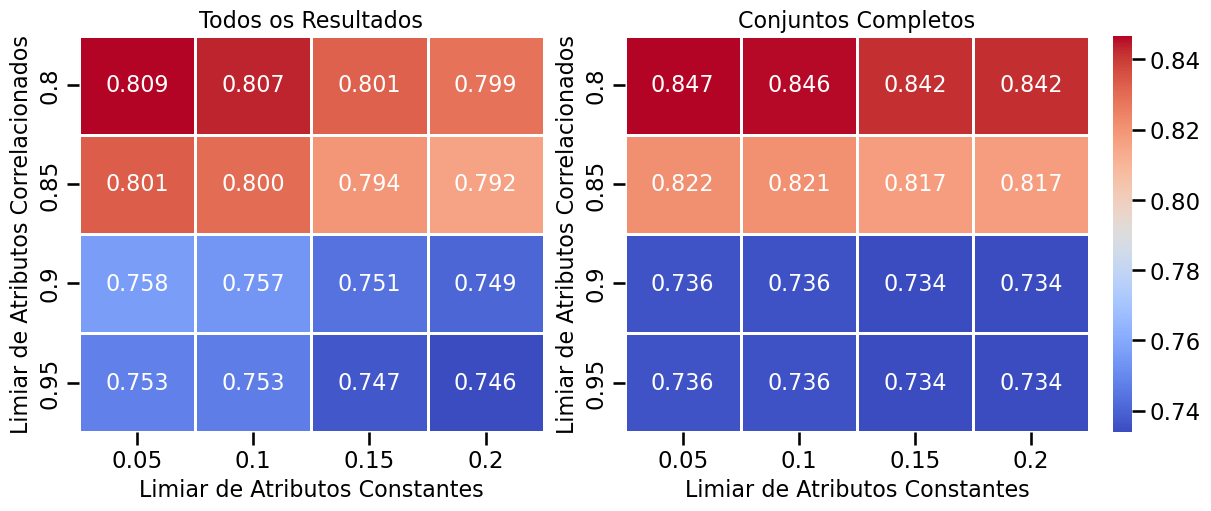

In [58]:
heatmap_data1 = df.groupby(['corr_threshold', 'const_threshold']).mean(numeric_only=True)['f1-score'].unstack()
heatmap_data2 = filtered_data_dv_all.groupby(['corr_threshold', 'const_threshold']).mean(numeric_only=True)['f1-score'].unstack()

# Ajustar tamanho da fonte globalmente
sns.set_context("talk")  # Ajusta o contexto para fontes maiores

fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Heatmap 1
sns.heatmap(heatmap_data1, annot=True, cmap='coolwarm', fmt=".3f", ax=axes[0], linewidths=1, linecolor='white', cbar=False, annot_kws={"color": "white", "fontsize": 16})
axes[0].set_title("Todos os Resultados", fontsize=16)
axes[0].set_xlabel("Limiar de Atributos Constantes", fontsize=16)
axes[0].set_ylabel("Limiar de Atributos Correlacionados", fontsize=16)

# Heatmap 2
sns.heatmap(heatmap_data2, annot=True, cmap='coolwarm', fmt=".3f", ax=axes[1], linewidths=1, linecolor='white', annot_kws={"color": "white", "fontsize": 16})
axes[1].set_title("Conjuntos Completos", fontsize=16)
axes[1].set_xlabel("Limiar de Atributos Constantes", fontsize=16)
axes[1].set_ylabel("Limiar de Atributos Correlacionados", fontsize=16)

plt.savefig('plots/best_threshold.pdf')


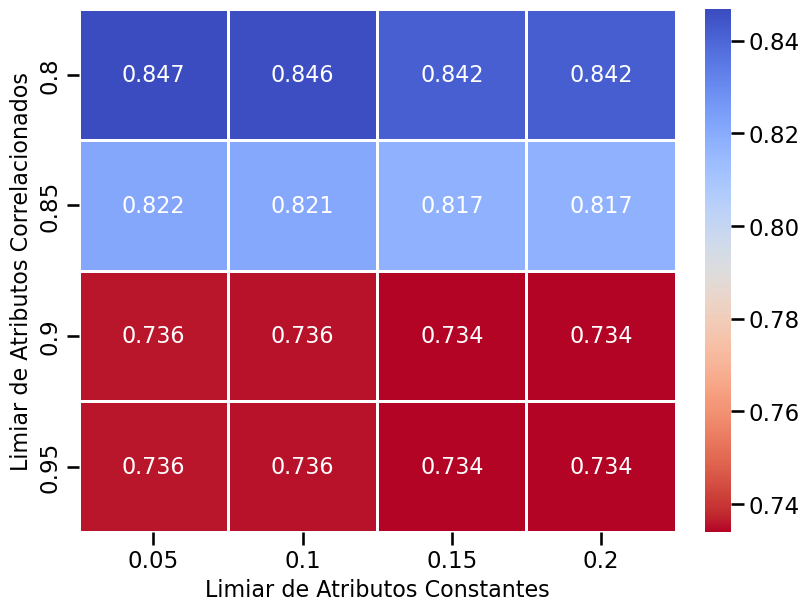

In [60]:
heatmap_data2 = filtered_data_dv_all.groupby(['corr_threshold', 'const_threshold']).mean(numeric_only=True)['f1-score'].unstack()

# Ajustar tamanho da fonte globalmente
sns.set_context("talk")  # Ajusta o contexto para fontes maiores

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

# Heatmap 2 com a inversão da escala de cores
sns.heatmap(heatmap_data2, annot=True, cmap='coolwarm_r', fmt=".3f", ax=ax, linewidths=1, linecolor='white', annot_kws={"color": "white", "fontsize": 16})
ax.set_xlabel("Limiar de Atributos Constantes", fontsize=16)
ax.set_ylabel("Limiar de Atributos Correlacionados", fontsize=16)

plt.savefig('plots/best_threshold.pdf')


In [34]:
filtered_data_dv_all.loc[:, 'corr_threshold'] = pd.to_numeric(filtered_data_dv_all['corr_threshold'], errors='coerce')
filtered_data_dv_all.loc[:, 'const_threshold'] = pd.to_numeric(filtered_data_dv_all['const_threshold'], errors='coerce')

In [35]:
filtered_data = filtered_data_dv_all[(filtered_data_dv_all['corr_threshold'] == 0.80) & 
                                      (filtered_data_dv_all['const_threshold'] == 0.05)]

In [36]:
filtered_data_dv_all = df[
    df['Dataset'].str.contains('data_dv_Form_Desis|data_dv_FormReg_Desis|data_dv_FormReg_DesisTran|data_dv_Reg_Desis|data_dv_Reg_DesisTran|data_dv_last_occurence_Form_Desis|data_dv_last_occurence_FormReg_Desis|data_dv_last_occurence_FormReg_DesisTran|data_dv_last_occurence_Reg_Desis|data_dv_last_occurence_Reg_DesisTran', regex=True)
]

filtered_data = filtered_data_dv_all[
    (filtered_data_dv_all['corr_threshold'] == 0.80) & 
    (filtered_data_dv_all['const_threshold'] == 0.05)
]

models = ['DT', 'RF', 'NB', 'KNN']
result = {model: filtered_data.loc[filtered_data['Model'] == model, 'f1-score'].values for model in models}

result_df = pd.DataFrame(result)

result_df.to_csv('filtered_models_f1_scores.csv', index=False)

print("CSV gerado com sucesso: 'filtered_models_f1_scores.csv'")


CSV gerado com sucesso: 'filtered_models_f1_scores.csv'


In [37]:
filtered_data.columns

Index(['Dataset', 'corr_threshold', 'const_threshold', 'seed',
       'class_distribution', 'dropout', 'regular', 'Model', 'Accuracy',
       'Balanced Accuracy', 'f1-score', 'recall', 'precision',
       'CM - True Positive', 'CM - False Negative', 'CM - False Positive',
       'CM - True Negative', 'atributos', 'data_model'],
      dtype='object')

C:\Users\pedro\AppData\Local\Temp\ipykernel_23300\1470980449.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Dataset'] = filtered_data['Dataset'].map(dataset_labels)
C:\Users\pedro\AppData\Local\Temp\ipykernel_23300\1470980449.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Dataset'] = pd.Categorical(filtered_data['Dataset'], categories=order, ordered=True)


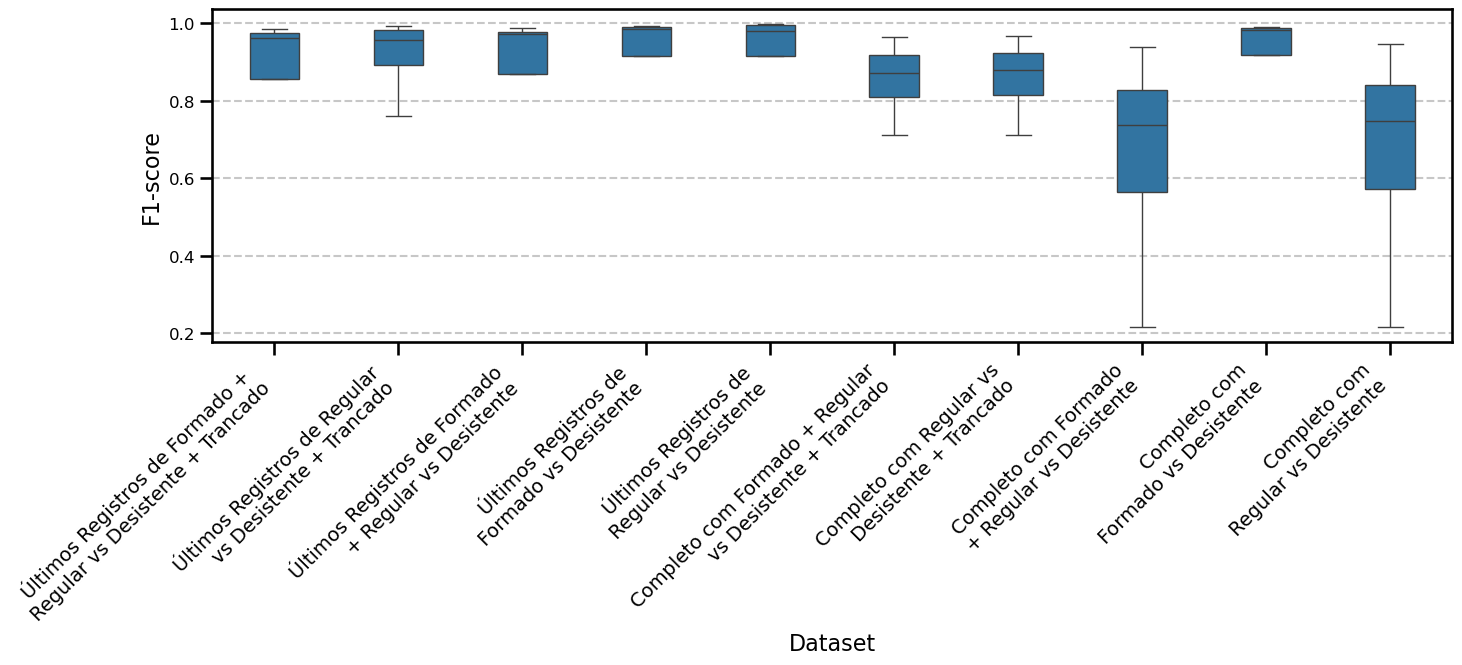

In [38]:
dataset_labels = {
    'data_dv_last_occurence_FormReg_DesisTran.csv': 'Últimos Registros de Formado + \nRegular vs Desistente + Trancado',
    'data_dv_last_occurence_Reg_DesisTran.csv': 'Últimos Registros de Regular\n vs Desistente + Trancado',
    'data_dv_last_occurence_FormReg_Desis.csv': 'Últimos Registros de Formado\n + Regular vs Desistente',
    'data_dv_last_occurence_Form_Desis.csv': 'Últimos Registros de\nFormado vs Desistente',
    'data_dv_last_occurence_Reg_Desis.csv': 'Últimos Registros de\nRegular vs Desistente',
    'data_dv_FormReg_DesisTran.csv': 'Completo com Formado + Regular\n vs Desistente + Trancado',
    'data_dv_Reg_DesisTran.csv': 'Completo com Regular vs\n Desistente + Trancado',
    'data_dv_FormReg_Desis.csv': 'Completo com Formado\n + Regular vs Desistente',
    'data_dv_Form_Desis.csv': 'Completo com\nFormado vs Desistente',
    'data_dv_Reg_Desis.csv': 'Completo com\nRegular vs Desistente',   
}

filtered_data['Dataset'] = filtered_data['Dataset'].map(dataset_labels)

existing_categories = filtered_data['Dataset'].dropna().unique()
order = [label for label in list(dataset_labels.values()) if label in existing_categories]

filtered_data['Dataset'] = pd.Categorical(filtered_data['Dataset'], categories=order, ordered=True)

plt.figure(figsize=(15, 7))
sns.boxplot(x='Dataset', y='f1-score', data=filtered_data, showfliers=False, width=0.4)

plt.xlabel('Dataset', fontsize=16)
plt.ylabel('F1-score', fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=14)

plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('plots/best_task.pdf')


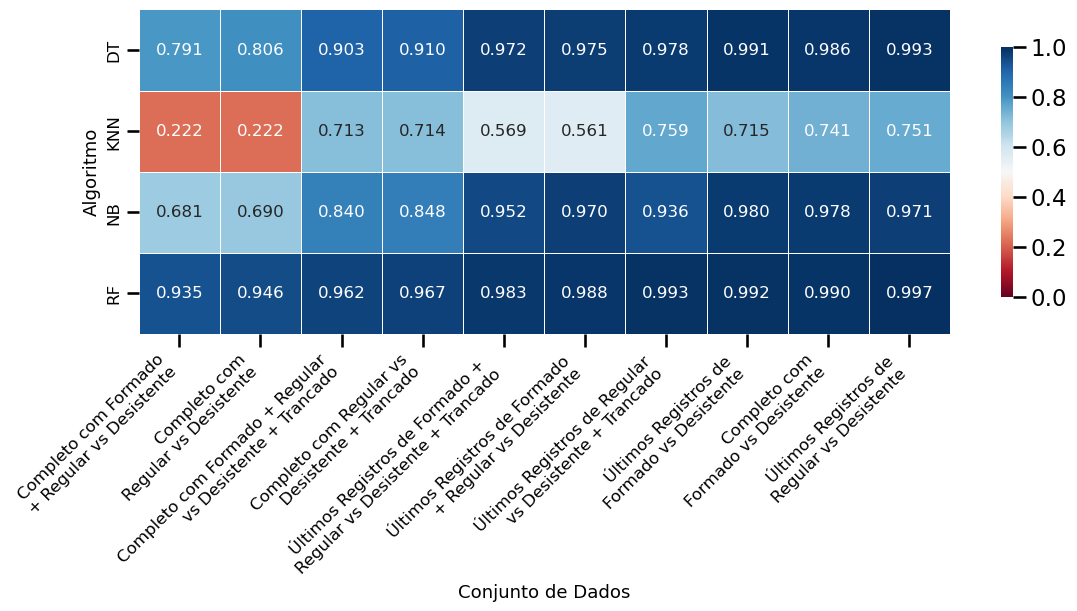

In [39]:
heatmap_data = filtered_data.pivot_table(index='Model', columns='Dataset', values='f1-score')

mean_scores_columns = heatmap_data.mean(axis=0)

heatmap_data_sorted = heatmap_data[mean_scores_columns.sort_values(ascending=True).index]

vmin = 0.0
vmax = 1.0

plt.figure(figsize=(12, 7))  

colors = ["#8B0000", "white", "#00008B"] 
custom_cmap = sns.color_palette("RdBu", as_cmap=True)

heatmap = sns.heatmap(heatmap_data_sorted, cmap=custom_cmap, annot=True, fmt=".3f", 
                      linewidths=.5, cbar_kws={"shrink": 0.5}, vmin=vmin, vmax=vmax, 
                      annot_kws={"size": 12}, square=True)

plt.ylabel('Algoritmo', fontsize=13) 
plt.xlabel('Conjunto de Dados', fontsize=13) 
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig('plots/heat_map_periods_full_datas.pdf', bbox_inches='tight', dpi=300)


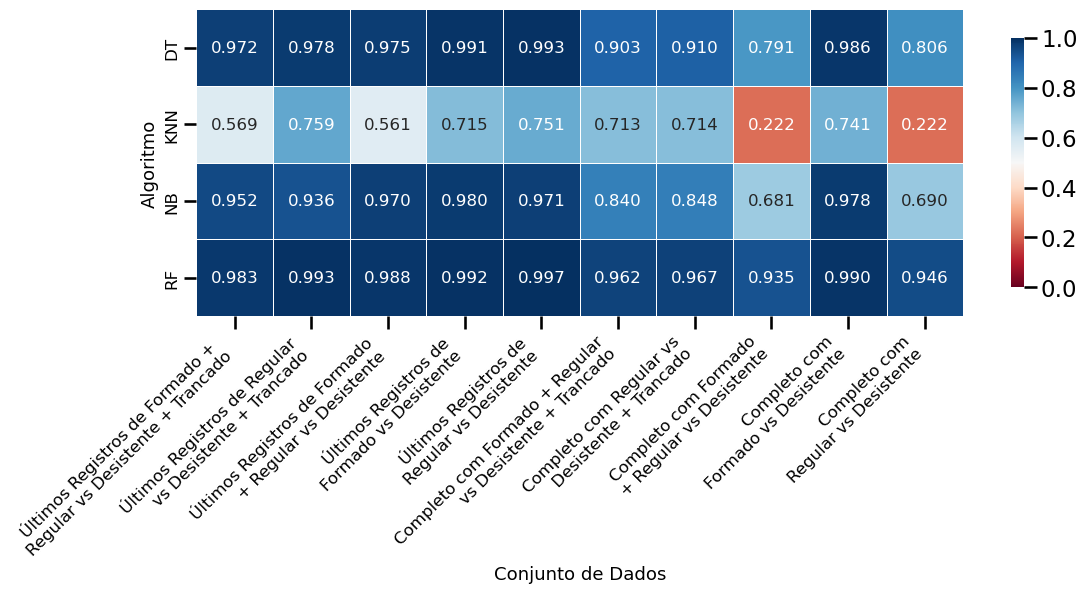

In [40]:
heatmap_data = filtered_data.pivot_table(index='Model', columns='Dataset', values='f1-score')

vmin = 0.0
vmax = 1.0

plt.figure(figsize=(12, 7))  

colors = ["#8B0000", "white", "#00008B"] 
custom_cmap = sns.color_palette("RdBu", as_cmap=True)

heatmap = sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt=".3f", 
                      linewidths=.5, cbar_kws={"shrink": 0.5}, vmin=vmin, vmax=vmax, 
                      annot_kws={"size": 12}, square=True)

plt.ylabel('Algoritmo', fontsize=13) 
plt.xlabel('Conjunto de Dados', fontsize=13) 
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig('plots/heat_map_periods_full_datas.pdf', bbox_inches='tight', dpi=300)


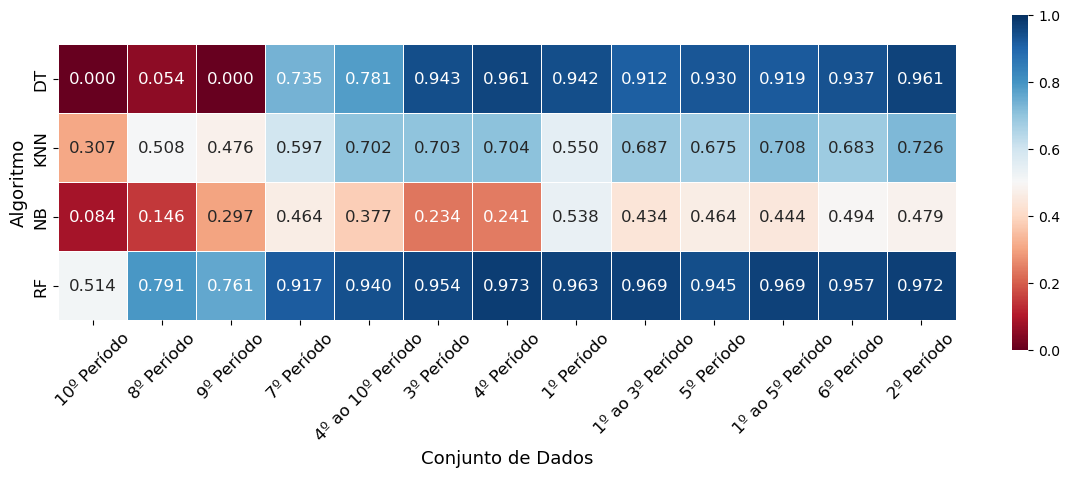

In [22]:
dataset_labels = {
    'data_dv_formreg_desistran_8_periodo.csv': '8º Período',
    'data_dv_formreg_desistran_7_periodo.csv': '7º Período',
    'data_dv_formreg_desistran_6_periodo.csv': '6º Período',
    'data_dv_formreg_desistran_5_periodo.csv': '5º Período',
    'data_dv_formreg_desistran_4_periodo.csv': '4º Período',
    'data_dv_formreg_desistran_3_periodo.csv': '3º Período',
    'data_dv_formreg_desistran_2_periodo.csv': '2º Período',
    'data_dv_formreg_desistran_1_periodo.csv': '1º Período',
    'data_dv_formreg_desistran_9_periodo.csv': '9º Período',
    'data_dv_formreg_desistran_10_periodo.csv': '10º Período',
    'data_dv_formreg_desistran_4a10.csv': '4º ao 10º Período',
    'data_dv_formreg_desistran_1a5.csv': '1º ao 5º Período',
    'data_dv_formreg_desistran_1a3.csv': '1º ao 3º Período'
}

filtered_data_dv.loc[:, 'Dataset'] = filtered_data_dv['Dataset'].replace(dataset_labels)

heatmap_data = filtered_data_dv.pivot_table(index='Model', columns='Dataset', values='f1-score')

mean_scores_columns = heatmap_data.mean(axis=0)

heatmap_data_sorted = heatmap_data[mean_scores_columns.sort_values(ascending=True).index]

vmin = 0.0
vmax = 1.0

plt.figure(figsize=(12, 7))  

colors = ["#8B0000", "white", "#00008B"] 
custom_cmap = sns.color_palette("RdBu", as_cmap=True)

heatmap = sns.heatmap(heatmap_data_sorted, cmap=custom_cmap, annot=True, fmt=".3f", 
                      linewidths=.5, cbar_kws={"shrink": 0.5}, vmin=vmin, vmax=vmax, 
                      annot_kws={"size": 12}, square=True)

plt.ylabel('Algoritmo', fontsize=13) 
plt.xlabel('Conjunto de Dados', fontsize=13) 

plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)

plt.tight_layout()

plt.savefig('plots/heat_map_periods_all_datas.pdf', bbox_inches='tight', dpi=300)


últimos registros

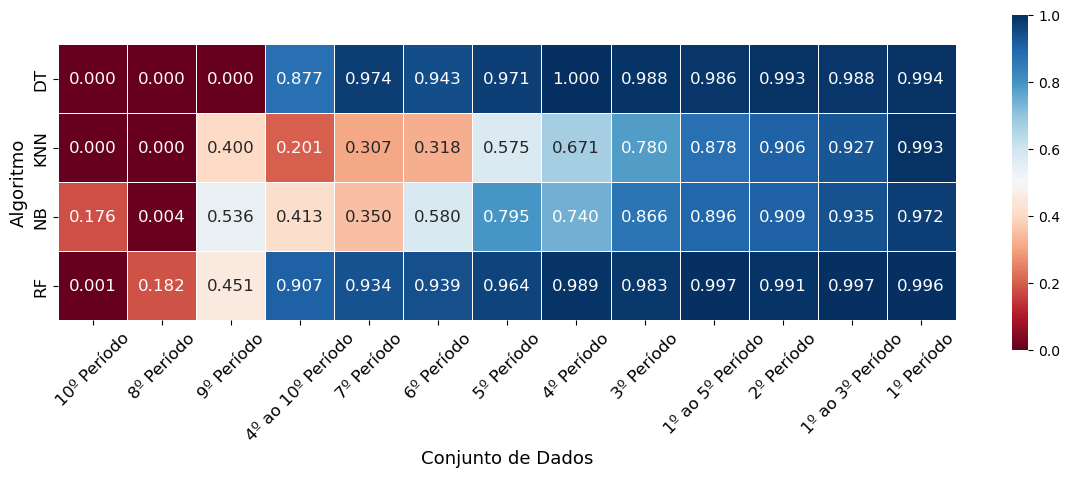

In [23]:
dataset_labels = {
    'data_dv_last_occurence_formreg_desistran_8_periodo.csv': '8º Período',
    'data_dv_last_occurence_formreg_desistran_7_periodo.csv': '7º Período',
    'data_dv_last_occurence_formreg_desistran_6_periodo.csv': '6º Período',
    'data_dv_last_occurence_formreg_desistran_5_periodo.csv': '5º Período',
    'data_dv_last_occurence_formreg_desistran_4_periodo.csv': '4º Período',
    'data_dv_last_occurence_formreg_desistran_3_periodo.csv': '3º Período',
    'data_dv_last_occurence_formreg_desistran_2_periodo.csv': '2º Período',
    'data_dv_last_occurence_formreg_desistran_1_periodo.csv': '1º Período',
    'data_dv_last_occurence_formreg_desistran_9_periodo.csv': '9º Período',
    'data_dv_last_occurence_formreg_desistran_10_periodo.csv': '10º Período',
    'data_dv_last_occurence_formreg_desistran_4a10.csv': '4º ao 10º Período',
    'data_dv_last_occurence_formreg_desistran_1a5.csv': '1º ao 5º Período',
    'data_dv_last_occurence_formreg_desistran_1a3.csv': '1º ao 3º Período'
}

filtered_data_dv_last_occurence.loc[:, 'Dataset'] = filtered_data_dv_last_occurence['Dataset'].replace(dataset_labels)

heatmap_data = filtered_data_dv_last_occurence.pivot_table(index='Model', columns='Dataset', values='f1-score')

mean_scores_columns = heatmap_data.mean(axis=0)

heatmap_data_sorted = heatmap_data[mean_scores_columns.sort_values(ascending=True).index]

vmin = 0.0
vmax = 1.0

plt.figure(figsize=(12, 7))  

colors = ["#8B0000", "white", "#00008B"] 
custom_cmap = sns.color_palette("RdBu", as_cmap=True)

heatmap = sns.heatmap(heatmap_data_sorted, cmap=custom_cmap, annot=True, fmt=".3f", 
                      linewidths=.5, cbar_kws={"shrink": 0.5}, vmin=vmin, vmax=vmax, 
                      annot_kws={"size": 12}, square=True)

plt.ylabel('Algoritmo', fontsize=13) 
plt.xlabel('Conjunto de Dados', fontsize=13) 

plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('plots/heat_map_periods_last_datas.pdf', bbox_inches='tight', dpi=300)


Analisando os resultados por período

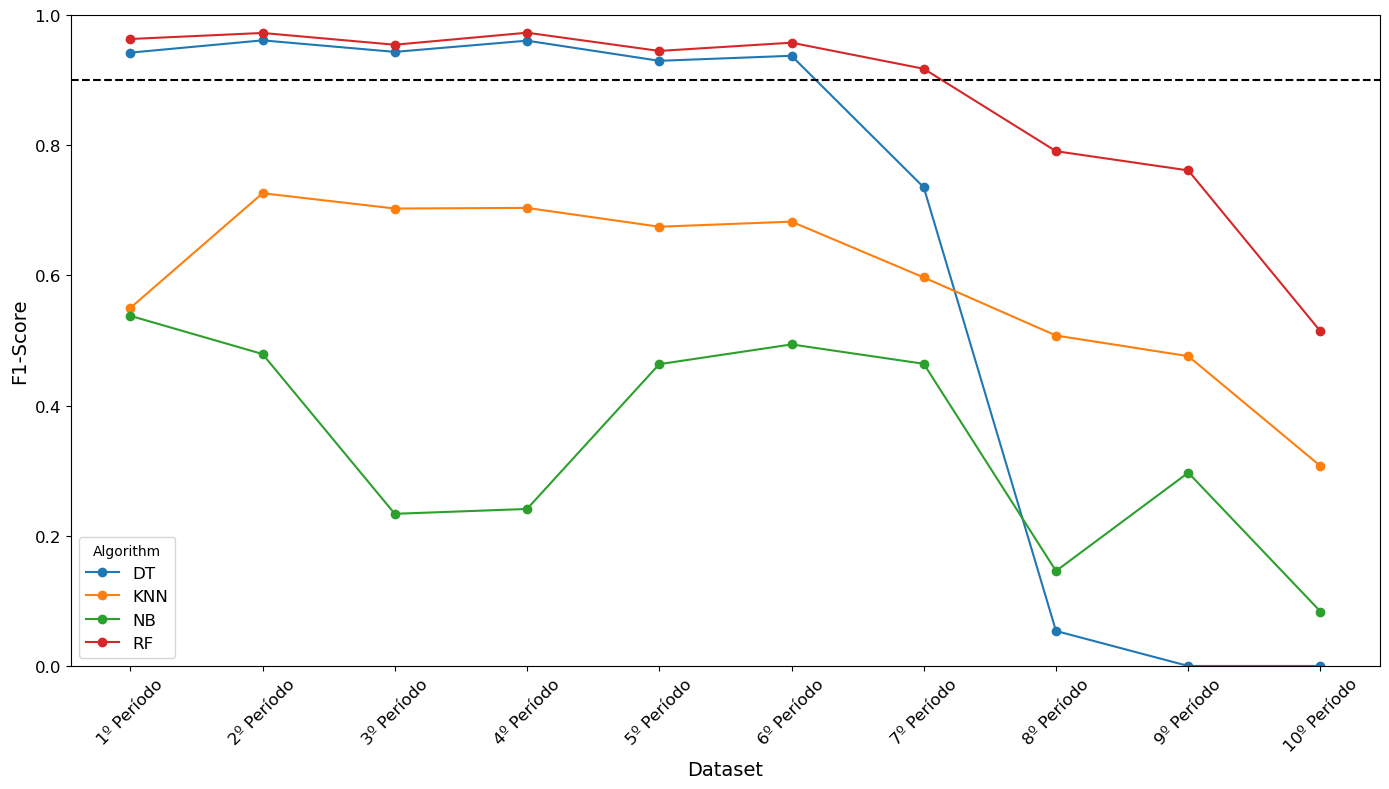

In [24]:
line_plot_data = filtered_data_dv.pivot_table(index='Dataset', columns='Model', values='f1-score')

line_plot_data.columns = line_plot_data.columns.str.replace('dt', 'DT', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('nb', 'NB', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('neigh', 'KNN', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('rf', 'RF', regex=False)

ordered_datasets = ['1º Período', '2º Período', '3º Período', '4º Período', '5º Período', 
                    '6º Período', '7º Período', '8º Período', '9º Período', '10º Período']

filtered_line_plot_data = line_plot_data.loc[ordered_datasets]

filtered_line_plot_data = filtered_line_plot_data.dropna(axis=0, how='all')

plt.figure(figsize=(14, 8))

for model in filtered_line_plot_data.columns:
    plt.plot(filtered_line_plot_data.index, filtered_line_plot_data[model], marker='o', label=model)

plt.ylim(0, 1)

plt.axhline(y=0.9, color='black', linestyle='--', label='_nolegend_')  

plt.xlabel('Dataset', fontsize=14)  
plt.ylabel('F1-Score', fontsize=14)  
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12) 

plt.legend(title='Algorithm', fontsize=12)

plt.tight_layout()
plt.savefig('plots/period_line_all_datas.pdf')

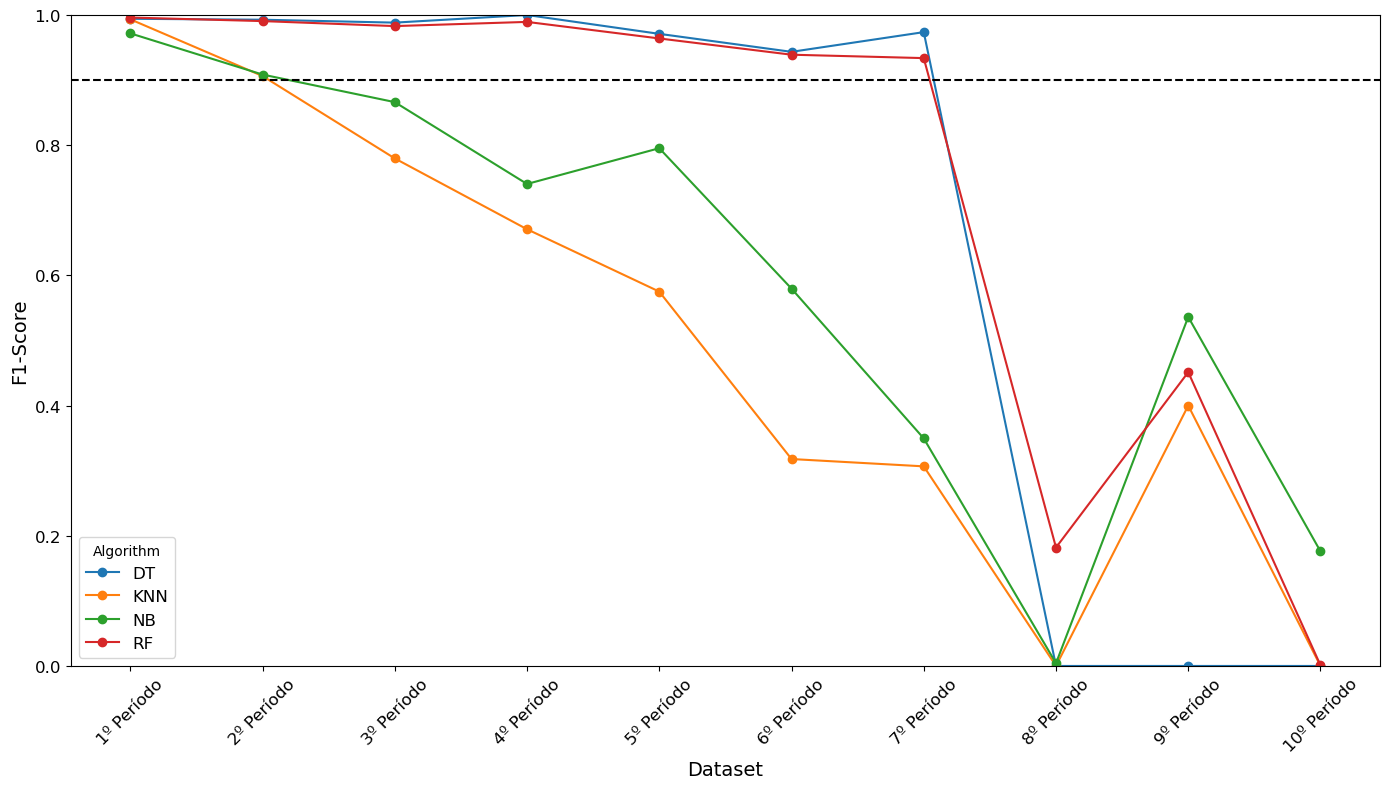

In [25]:
line_plot_data = filtered_data_dv_last_occurence.pivot_table(index='Dataset', columns='Model', values='f1-score')

line_plot_data.columns = line_plot_data.columns.str.replace('dt', 'DT', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('nb', 'NB', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('neigh', 'KNN', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('rf', 'RF', regex=False)

ordered_datasets = ['1º Período', '2º Período', '3º Período', '4º Período', '5º Período', 
                    '6º Período', '7º Período', '8º Período', '9º Período', '10º Período']

filtered_line_plot_data = line_plot_data.loc[ordered_datasets]

filtered_line_plot_data = filtered_line_plot_data.dropna(axis=0, how='all')

plt.figure(figsize=(14, 8))

for model in filtered_line_plot_data.columns:
    plt.plot(filtered_line_plot_data.index, filtered_line_plot_data[model], marker='o', label=model)

plt.ylim(0, 1)

plt.axhline(y=0.9, color='black', linestyle='--', label='_nolegend_')  

plt.xlabel('Dataset', fontsize=14)  
plt.ylabel('F1-Score', fontsize=14)  
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12) 

plt.legend(title='Algorithm', fontsize=12)

plt.tight_layout()
plt.savefig('plots/period_line_last_datas.pdf')

agora para os períodos agrupados

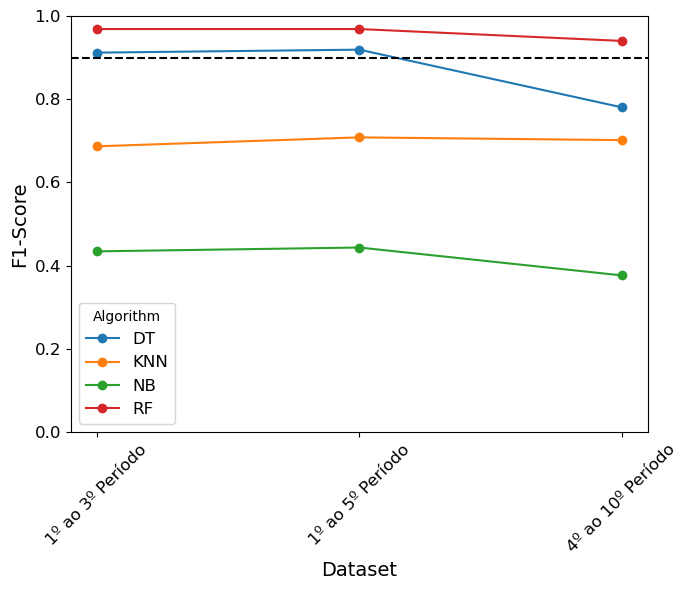

In [26]:
line_plot_data = filtered_data_dv.pivot_table(index='Dataset', columns='Model', values='f1-score')

line_plot_data.columns = line_plot_data.columns.str.replace('dt', 'DT', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('nb', 'NB', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('neigh', 'KNN', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('rf', 'RF', regex=False)

ordered_datasets = ['1º ao 3º Período', '1º ao 5º Período', '4º ao 10º Período']

filtered_line_plot_data = line_plot_data.loc[ordered_datasets]

filtered_line_plot_data = filtered_line_plot_data.dropna(axis=0, how='all')

plt.figure(figsize=(7,6))

for model in filtered_line_plot_data.columns:
    plt.plot(filtered_line_plot_data.index, filtered_line_plot_data[model], marker='o', label=model)

plt.ylim(0, 1)

plt.axhline(y=0.9, color='black', linestyle='--', label='_nolegend_')  

plt.xlabel('Dataset', fontsize=14)  
plt.ylabel('F1-Score', fontsize=14)  
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12) 

plt.legend(title='Algorithm', fontsize=12)

plt.tight_layout()
plt.savefig('plots/grouped_period_line_all_datas.pdf')

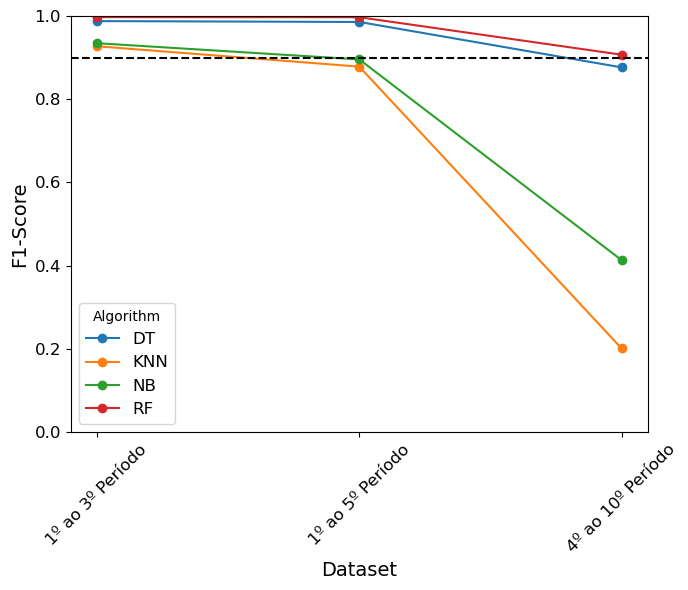

In [27]:
line_plot_data = filtered_data_dv_last_occurence.pivot_table(index='Dataset', columns='Model', values='f1-score')

line_plot_data.columns = line_plot_data.columns.str.replace('dt', 'DT', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('nb', 'NB', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('neigh', 'KNN', regex=False)
line_plot_data.columns = line_plot_data.columns.str.replace('rf', 'RF', regex=False)

ordered_datasets = ['1º ao 3º Período', '1º ao 5º Período', '4º ao 10º Período']

filtered_line_plot_data = line_plot_data.loc[ordered_datasets]

filtered_line_plot_data = filtered_line_plot_data.dropna(axis=0, how='all')

plt.figure(figsize=(7, 6))

for model in filtered_line_plot_data.columns:
    plt.plot(filtered_line_plot_data.index, filtered_line_plot_data[model], marker='o', label=model)

plt.ylim(0, 1)

plt.axhline(y=0.9, color='black', linestyle='--', label='_nolegend_')  

plt.xlabel('Dataset', fontsize=14)  
plt.ylabel('F1-Score', fontsize=14)  
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12) 

plt.legend(title='Algorithm', fontsize=12)

plt.tight_layout()
plt.savefig('plots/grouped_period_line_last_datas.pdf')

In [41]:
average_cm_int = np.array([[36960, 303],
                           [189, 6207]])

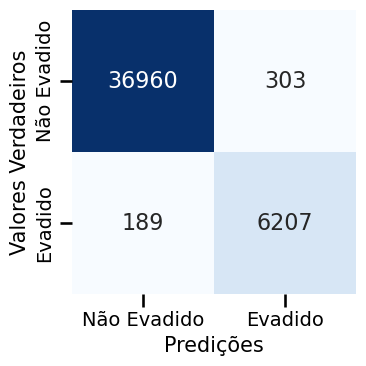

In [44]:
opt_labels = ["Não Evadido", "Evadido"]

plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(
    average_cm_int, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=opt_labels, 
    yticklabels=opt_labels, 
    cbar=False,
    annot_kws={"size": 16}  
)

plt.xlabel('Predições', fontsize=15) 
plt.ylabel('Valores Verdadeiros', fontsize=15)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 
    
plt.tight_layout()
plt.savefig('plots/cm_all_data.pdf', format='pdf')


In [46]:
average_cm_int = np.array([[2955, 29],
                           [59, 2499]])

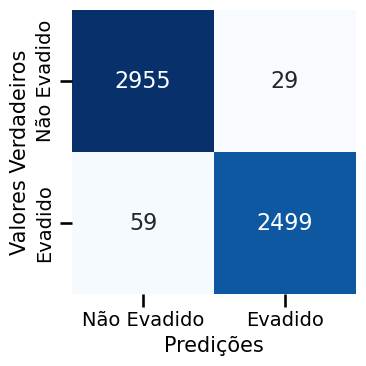

In [47]:
opt_labels = ["Não Evadido", "Evadido"]

plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(
    average_cm_int, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=opt_labels, 
    yticklabels=opt_labels, 
    cbar=False,
    annot_kws={"size": 16}  
)

plt.xlabel('Predições', fontsize=15) 
plt.ylabel('Valores Verdadeiros', fontsize=15)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 
    
plt.tight_layout()
plt.savefig('plots/cm_last_data.pdf', format='pdf')